# Notebook 04: Optimal Climate Policy under Tipping Risk

In this notebook, I formulate and solve a dynamic climate policy problem.

My goal is to determine:
- how emissions could evolve over time,
- when carbon dioxide removal (CDR) becomes optimal,
- and how tipping-point risk changes optimal policy.

This notebook brings together climate science, economics, and computation.


## Units and calibration

In this notebook, I interpret all model variables in physical climate-policy units.

- Time step: 1 year
- Carbon stock \\( C_t \\): gigatonnes of CO₂ (GtCO₂)
- Emissions \\( E_t \\): GtCO₂ per year
- Carbon removal \\( R_t \\): GtCO₂ per year
- Welfare: dimensionless (utility units)

This allows direct interpretation in terms of:
- Global carbon budgets,
- IPCC mitigation pathways,
- Paris Agreement temperature targets.


## What does “optimal climate policy” mean?

By “optimal”, I mean the policy that maximizes expected discounted social welfare
over all future years.

This does NOT mean:
- zero emissions,
- hitting a fixed temperature target,
- minimizing carbon at all costs.

Instead, it means balancing:
- economic benefits from emissions,
- costs of mitigation and carbon removal,
- risks of irreversible climate tipping.


## 1. Economic intuition

I study the problem of a social planner who chooses climate policy over time.

The planner understands that:
- carbon accumulates in the atmosphere,
- higher carbon increases the probability of a catastrophic tipping point,
- tipping causes irreversible welfare losses.

The planner therefore faces a dynamic decision problem under risk.


## 2. State and control variables

### State variable
- \\( C_t \\): atmospheric carbon stock at time \(t\)

 #### This atmospheric carbon stock captures:
- cumulative past emissions,
- the inertia of the climate system,
- the driver of long-run climate risk.

Climate damages and tipping risk depend on the level of carbon,
not just current emissions.


### Control variables
- \\( E_t \ge 0 \\): emissions
- \\( R_t \ge 0 \\): carbon dioxide removal (CDR)
  
#### These variables summarizes all relevant climate information and they are policy-relevant decisions:
- emissions reflect energy and production choices,
- removal reflects investment in negative-emissions technologies.



## 3. Carbon dynamics

The carbon stock evolves according to a physical accounting identity:

\\[
C_{t+1} = C_t + E_t - R_t
\\]

This equation means:
- emissions increase climate risk,
- carbon removal reduces accumulated risk.

This is a law of motion, not a behavioral assumption.


## 4. Welfare and costs

I assume:
- emissions generate economic benefits,
- carbon removal is costly.

Instantaneous welfare before tipping is:

\\[
u(E_t, R_t) = \log(E_t) - \frac{\phi}{2} R_t^2
\\]

This captures diminishing returns to emissions and convex CDR costs.


### Why does welfare depend on emissions?

Emissions \\(E_t\\) proxy for:
- energy use,
- industrial production,
- consumption and income.

Higher emissions correspond to higher economic output,
but with diminishing marginal benefits.


### Why use a logarithmic utility?

The logarithm implies:
- diminishing marginal welfare from emissions,
- an interior optimal solution,
- analytical and numerical stability.

Units:
- \\(E_t\\) has units (GtCO₂/year),
- \\(\log(E_t)\\) is dimensionless,
- welfare is measured in abstract utility units.


## Cost of carbon dioxide removal

Carbon removal is costly and exhibits increasing marginal costs:

\\[
\frac{\phi}{2} R_t^2
\\]

Where:
- \\(R_t\\): carbon removal (GtCO₂/year)
- \\(\phi\\): cost curvature parameter


### Interpretation of φ

The parameter \( \phi \) governs how quickly removal costs increase.

Units:
\\[
[\phi] = (\text{GtCO₂/year})^{-2}
\\]

Economic interpretation:
- Low \\( \phi \\): cheap, scalable CDR
- High \\( \phi \\): expensive, limited CDR

This allows me to explore different technological futures.


## 5. Climate tipping-point risk

I model tipping as a probabilistic event rather than a fixed threshold.

The probability of tipping in period \\(t\\) is given by a hazard rate:

\\[
h(C_t) = h_0 \exp(\gamma C_t)
\\]

Where:
- \\(h(C_t)\\): annual tipping probability
- \\( h_0 \\) is baseline risk,
- \\( \gamma \\) controls how sensitive risk is to carbon accumulation.



### Interpretation

Higher atmospheric carbon stocks increase the likelihood
of irreversible climate changes such as:
- ice-sheet collapse,
- permafrost thaw,
- ecosystem dieback.

Tipping is uncertain but becomes more likely as carbon accumulates.


## 6. Damages from tipping

If a tipping point occurs:
- welfare falls permanently by a fraction \\( \Delta \\)
- the climate system enters an irreversible damaged state.

This means future welfare is permanently lower.


## 7. Dynamic optimization problem

Let \\(V(C)\\) denote the value function before tipping.

The Bellman equation is:

\\[
\begin{aligned}
V(C) = \max_{E,R} \Big\{
& \log(E) - \frac{\phi}{2}R^2 \\
& + \beta \left[
(1 - h(C_t)) V(C_{t+1}) + h(C_t) V^{post}
\right]
\Big\}
\end{aligned}
\\]

where:
\\[
C_{t+1} = C_t + E_t - R_t
\\]


## Discount factor β

The parameter \\( \beta \in (0,1) \\) is the social discount factor.

\\[
\beta = \frac{1}{1 + \rho}
\\]

Where:
- \\( \rho \\): social discount rate (per year)

β reflects how society values future welfare relative to present welfare.


## Expected future welfare

Future welfare is uncertain due to tipping risk.

Expected continuation value:

\\[
(1 - h(C_t)) V(C_{t+1}) + h(C_t) V^{post}
\\]

This is a probability-weighted average over possible future states.


## 8. Value after tipping

After tipping, climate damages are irreversible and welfare is permanently reduced.

I approximate the post-tipping value (Welfare after tipping) as:

\\[
V^{post} = (1-\Delta) \frac{\log(\bar{E})}{1-\beta}
\\]

Where \\( \Delta \\) is the fraction of welfare lost.

This keeps the model tractable while capturing irreversibility.




In [15]:
import numpy as np
import matplotlib.pyplot as plt


In [16]:
beta = 0.95
phi = 0.1
h0 = 0.005
gamma = 0.02
Delta = 0.4

C_grid = np.linspace(0, 300, 120)
E_grid = np.linspace(0.5, 20, 40)
R_grid = np.linspace(0, 10, 30)


In [17]:
def hazard(C):
    return h0 * np.exp(gamma * C)

def utility(E):
    return np.log(E)

def post_tipping_value(E_bar=10):
    return (1 - Delta) * utility(E_bar) / (1 - beta)


## 9. Numerical solution strategy

I solve the model numerically using value function iteration.

Steps:
1. Discretize the state space
2. Guess an initial value function
3. Iterate on the Bellman equation
4. Recover optimal policy functions


In [18]:
V = np.zeros(len(C_grid))
V_new = np.zeros_like(V)

policy_E = np.zeros_like(V)
policy_R = np.zeros_like(V)

for _ in range(200):
    for i, C in enumerate(C_grid):
        best_val = -1e12
        for E in E_grid:
            for R in R_grid:
                C_next = C + E - R
                if C_next < 0 or C_next > C_grid[-1]:
                    continue
                j = np.searchsorted(C_grid, C_next)
                h = hazard(C)
                val = (
                    utility(E)
                    - 0.5 * phi * R**2
                    + beta * ((1 - h) * V[j] + h * post_tipping_value())
                )
                if val > best_val:
                    best_val = val
                    policy_E[i] = E
                    policy_R[i] = R
                    V_new[i] = val
    V[:] = V_new[:]


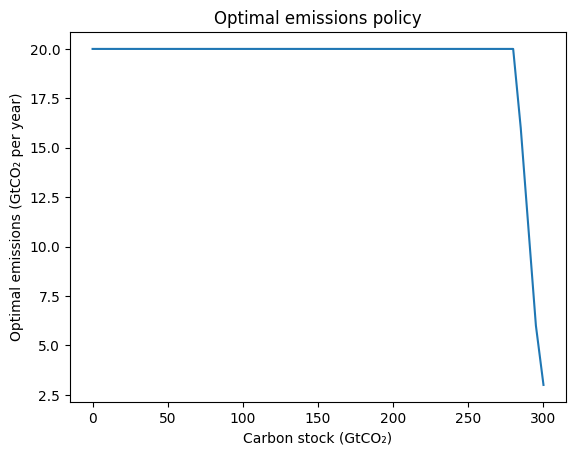

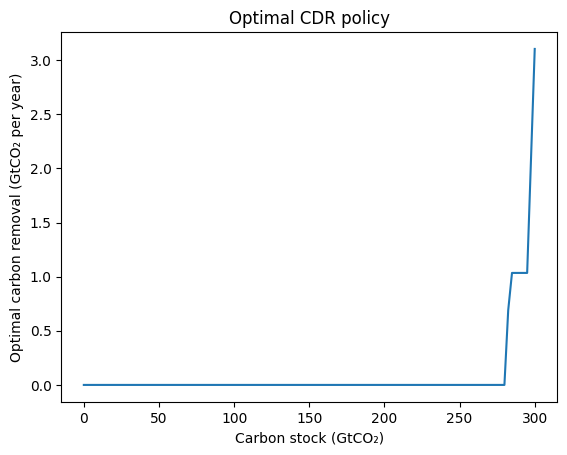

In [20]:
plt.figure()
plt.plot(C_grid, policy_E)
plt.xlabel("Carbon stock (GtCO₂)")
plt.ylabel("Optimal emissions (GtCO₂ per year)")
plt.title("Optimal emissions policy")
plt.show()

plt.figure()
plt.plot(C_grid, policy_R)
plt.xlabel("Carbon stock (GtCO₂)")
plt.ylabel("Optimal carbon removal (GtCO₂ per year)")
plt.title("Optimal CDR policy")
plt.show()


## 10. Interpretation

I find that:
- optimal emissions decline as carbon accumulates,
- carbon removal is activated only at high carbon levels,
- tipping risk induces precautionary behavior.

The model endogenously generates:
- early mitigation,
- late-stage carbon removal,
- declining emissions paths.


## 11. What this notebook shows

In this notebook, I have shown how:
- climate policy is a dynamic optimization problem,
- tipping-point risk fundamentally changes optimal decisions,
- carbon removal emerges as insurance rather than a substitute for mitigation.

This provides the foundation for introducing carbon budgets and regional heterogeneity next.
